In [1]:
import numpy as np
import Adaboost as ab
import Utils as utils
from matplotlib import pyplot as plt
import cv2
from tqdm.notebook import tqdm

In [2]:
pos_training_path = 'data/trainset/faces'
neg_training_path = 'data/trainset/non-faces'
pos_testing_path = 'data/testset/faces'
neg_testing_path = 'data/testset/non-faces'

num_classifiers = 2
min_feature_height = 4
max_feature_height = 10
min_feature_width = 4
max_feature_width = 10

In [3]:
print('Loading faces for training..')
faces_training = utils.load_images(pos_training_path)
#faces_ii_training = list(map(ii.to_integral_image, faces_training))
print('..done. ' + str(len(faces_training)) + ' faces loaded.\n\nLoading non faces..')
non_faces_training = utils.load_images(neg_training_path)
#non_faces_ii_training = list(map(ii.to_integral_image, non_faces_training))
print('..done. ' + str(len(non_faces_training)) + ' non faces loaded.\n')

print('Loading faces for testing..')
faces_testing = utils.load_images(pos_testing_path)
#faces_ii_testing = list(map(ii.to_integral_image, faces_testing))
print('..done. ' + str(len(faces_testing)) + ' faces loaded.\n\nLoading test non faces..')
non_faces_testing = utils.load_images(neg_testing_path)
#non_faces_ii_testing = list(map(ii.to_integral_image, non_faces_testing))
print('..done. ' + str(len(non_faces_testing)) + ' non faces loaded.\n')

Loading faces for training..
..done. 2429 faces loaded.

Loading non faces..


D:\SoSe-2022\Computer-Vision\viola-jones_face_detection\Utils.py:106: RuntimeWarning: invalid value encountered in true_divide
  img_arr /= img_arr.max()


..done. 8548 non faces loaded.

Loading faces for testing..
..done. 472 faces loaded.

Loading test non faces..
..done. 19572 non faces loaded.



In [4]:
classifiers = ab.learn(faces_training, non_faces_training, num_classifiers, min_feature_height, max_feature_height, min_feature_width, max_feature_width)

generated  22842  features
searching for classifier 0 of  2


  0%|          | 0/22842 [00:00<?, ?it/s]

searching for classifier 1 of  2


  0%|          | 0/22842 [00:00<?, ?it/s]

In [5]:
classifiers

array([<HaarLikeFeature.HaarLikeFeature object at 0x000002B3EF9D82B0>,
      dtype=object)

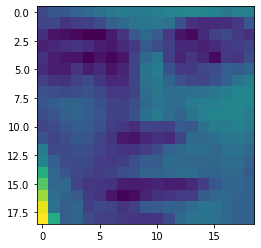

In [6]:
plt.imshow(faces_training[7], interpolation='nearest')
#plt.show()

draw the classifier on face

In [8]:

classifiers[0].__dict__.keys()
c = classifiers[1]
print(c.feature,c.x,c.y,c.width,c.height,c.polarity)

(1, 2) 0 0 4 4 1


In [9]:
image = cv2.rectangle(faces_training[7], (c.x,c.y), (c.x+c.width,c.y+c.height), (255, 255, 0), -1)
image = cv2.resize(image, (960, 540)) 
cv2.imshow("hi",image)
cv2.waitKey(0)  

-1